In [0]:
#import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


First, a general look of two data sets: train.csv and test.csv

In [0]:
Rate_train = pd.read_csv("train.csv")
Rate_train.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,4,Female,72,3,4,Manager,4,Married,17875,11761,4,Y,Yes,13,3,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,1546,4,Male,97,3,1,Research Scientist,4,Married,2132,4585,4,Y,No,20,4,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,1066,3,Male,74,3,2,Sales Executive,1,Married,8396,22217,1,Y,No,14,3,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,789,1,Male,76,2,3,Sales Executive,1,Single,7587,14229,1,Y,No,15,3,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,3,Male,73,1,1,Sales Representative,4,Single,1118,8040,1,Y,Yes,14,3,4,80,0,1,4,3,1,0,1,0


In [0]:
Rate_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   1176 non-null   int64 
 1   Age                       1176 non-null   int64 
 2   Attrition                 1176 non-null   object
 3   BusinessTravel            1176 non-null   object
 4   DailyRate                 1176 non-null   int64 
 5   Department                1176 non-null   object
 6   DistanceFromHome          1176 non-null   int64 
 7   Education                 1176 non-null   int64 
 8   EducationField            1176 non-null   object
 9   EmployeeCount             1176 non-null   int64 
 10  EmployeeNumber            1176 non-null   int64 
 11  EnvironmentSatisfaction   1176 non-null   int64 
 12  Gender                    1176 non-null   object
 13  HourlyRate                1176 non-null   int64 
 14  JobInvolvement          

In [0]:
Rate_test = pd.read_csv("test.csv")
Rate_test.head()

,user_id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,442,36,Non-Travel,635,Sales,10,4,Medical,1,592,2,Male,32,3,3,Sales Executive,4,Single,9980,15318,1,Y,No,14,3,4,80,0,10,3,2,10,3,9,7
1,1091,33,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,1545,4,Male,44,2,2,Manufacturing Director,2,Single,4320,24152,1,Y,No,13,3,4,80,0,5,2,3,5,3,0,2
2,981,35,Travel_Frequently,662,Sales,18,4,Marketing,1,1380,4,Female,67,3,2,Sales Executive,3,Married,4614,23288,0,Y,Yes,18,3,3,80,1,5,0,2,4,2,3,2
3,785,40,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,1092,1,Male,61,3,3,Healthcare Representative,4,Married,10322,26542,4,Y,No,20,4,4,80,1,14,6,3,11,10,11,1
4,1332,29,Travel_Frequently,459,Research & Development,24,2,Life Sciences,1,1868,4,Male,73,2,1,Research Scientist,4,Single,2439,14753,1,Y,Yes,24,4,2,80,0,1,3,2,1,0,1,0


In [0]:
Rate_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   294 non-null    int64 
 1   Age                       294 non-null    int64 
 2   BusinessTravel            294 non-null    object
 3   DailyRate                 294 non-null    int64 
 4   Department                294 non-null    object
 5   DistanceFromHome          294 non-null    int64 
 6   Education                 294 non-null    int64 
 7   EducationField            294 non-null    object
 8   EmployeeCount             294 non-null    int64 
 9   EmployeeNumber            294 non-null    int64 
 10  EnvironmentSatisfaction   294 non-null    int64 
 11  Gender                    294 non-null    object
 12  HourlyRate                294 non-null    int64 
 13  JobInvolvement            294 non-null    int64 
 14  JobLevel                  

Luckily, no entry has none value. 
Next, combiningf the two files.

In [0]:
Full_data = Rate_train.append(Rate_test)
Full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 293
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1176 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement           

In [0]:
Full_data.describe()

,user_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,734.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1469.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [0]:
Full_data.nunique(), Full_data.EmployeeCount.unique(), Full_data.Over18.unique(), Full_data.StandardHours.unique()

(user_id                     1470
 Age                           43
 Attrition                      2
 BusinessTravel                 3
 DailyRate                    886
 Department                     3
 DistanceFromHome              29
 Education                      5
 EducationField                 6
 EmployeeCount                  1
 EmployeeNumber              1470
 EnvironmentSatisfaction        4
 Gender                         2
 HourlyRate                    71
 JobInvolvement                 4
 JobLevel                       5
 JobRole                        9
 JobSatisfaction                4
 MaritalStatus                  3
 MonthlyIncome               1349
 MonthlyRate                 1427
 NumCompaniesWorked            10
 Over18                         1
 OverTime                       2
 PercentSalaryHike             15
 PerformanceRating              2
 RelationshipSatisfaction       4
 StandardHours                  1
 StockOptionLevel               4
 TotalWorkingY

In [0]:
Full_data = Full_data.drop(["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"],axis=1)
Full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 293
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1176 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                  

Now, LabelEncode/ OneHotEncode the object-type columns.

In [0]:
Full_data.Attrition.unique(), Full_data.BusinessTravel.unique(), Full_data.Department.unique(), Full_data.EducationField.unique(), Full_data.Gender.unique(), Full_data.JobRole.unique(), Full_data.MaritalStatus.unique(), Full_data.OverTime.unique()

(array(['No', 'Yes', nan], dtype=object),
 array(['Travel_Rarely', 'Non-Travel', 'Travel_Frequently'], dtype=object),
 array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
 array(['Life Sciences', 'Technical Degree', 'Marketing', 'Medical',
        'Human Resources', 'Other'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Manager', 'Research Scientist', 'Sales Executive',
        'Sales Representative', 'Laboratory Technician',
        'Manufacturing Director', 'Human Resources', 'Research Director',
        'Healthcare Representative'], dtype=object),
 array(['Married', 'Single', 'Divorced'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [0]:
# ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
Full_data = pd.get_dummies(Full_data,dummy_na=True)
Full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 293
Data columns (total 62 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   user_id                            1470 non-null   int64
 1   Age                                1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked   

Split Full_data into two DataFrames: train_clean and test_clean

In [0]:
train_clean = Full_data.iloc[:1175,:]
test_clean = Full_data.iloc[1175:,:]
test_clean.drop(['Attrition_No', 'Attrition_Yes','Attrition_nan'],axis=1)

,user_id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,BusinessTravel_nan,Department_Human Resources,Department_Research & Development,Department_Sales,Department_nan,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EducationField_nan,Gender_Female,Gender_Male,Gender_nan,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_nan,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_nan,OverTime_No,OverTime_Yes,OverTime_nan
1175,684,40,658,10,4,1,67,2,3,2,9705,20652,2,12,3,2,1,11,2,2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
0,442,36,635,10,4,2,32,3,3,4,9980,15318,1,14,3,4,0,10,3,2,10,3,9,7,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,1091,33,575,25,3,4,44,2,2,2,4320,24152,1,13,3,4,0,5,2,3,5,3,0,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,981,35,662,18,4,4,67,3,2,3,4614,23288,0,18,3,3,1,5,0,2,4,2,3,2,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,785,40,1492,20,4,1,61,3,3,4,10322,26542,4,20,4,4,1,14,6,3,11,10,11,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1439,36,557,3,3,1,94,2,3,4,7644,12695,0,19,3,3,2,10,2,3,9,7,3,4,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
290,481,34,254,1,2,2,83,2,1,4,3622,22794,1,13,3,4,1,6,3,3,6,5,1,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
291,124,31,249,6,4,2,76,1,2,3,6172,20739,4,18,3,2,0,12,3,2,7,7,7,7,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
292,198,38,1261,2,4,4,88,3,2,3,6553,7259,9,14,3,2,0,14,3,3,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [0]:
train_clean.describe()

,user_id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,Attrition_nan,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,BusinessTravel_nan,Department_Human Resources,Department_Research & Development,Department_Sales,Department_nan,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EducationField_nan,Gender_Female,Gender_Male,Gender_nan,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_nan,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_nan,OverTime_No,OverTime_Yes,OverTime_nan
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.0,1175.000000,1175.000000,1175.000000,1175.0,1175.000000,1175.000000,1175.000000,1175.0,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.0,1175.000000,1175.000000,1175.0,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.0,1175.000000,1175.000000,1175.000000,1175.0,1175.000000,1175.000000,1175.0
mean,736.168511,36.802553,802.155745,9.159149,2.917447,2.752340,65.128511,2.725106,2.054468,2.733617,6455.927660,14241.708936,2.703830,15.154894,3.150638,2.714894,0.805106,11.161702,2.767660,2.765106,6.987234,4.202553,2.162553,4.102128,0.840000,0.160000,0.0,0.107234,0.187234,0.705532,0.0,0.045106,0.657021,0.297872,0.0,0.019574,0.417021,0.104681,0.316596,0.051064,0.091064,0.0,0.394043,0.605957,0.0,0.083404,0.036596,0.178723,0.068936,0.099574,0.053617,0.204255,0.218723,0.056170,0.0,0.225532,0.445957,0.328511,0.0,0.725106,0.274894,0.0
std,419.512758,9.068929,406.097808,8.140652,1.009745,1.095496,20.302894,0.715019,1.106167,1.102739,4725.907306,7134.354561,2.522291,3.652939,0.357848,1.080842,0.865961,7.750874,1.251088,0.713206,6.094431,3.630717,3.208798,3.563699,0.366762,0.366762,0.0,0.309542,0.390265,0.455997,0.0,0.207626,0.474907,0.457518,0.0,0.138592,0.493276,0.306272,0.465346,0.220222,0.287822,0.0,0.488852,0.488852,0.0,0.276610,0.187847,0.383284,0.253453,0.299559,0.225356,0.403328,0.413557,0.230348,0.0,0.418110,0.497282,0.469872,0.0,0.446651,0.446651,0.0
min,0.000000,18.000000,104.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,374.500000,30.000000,463.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2858.500000,7911.500000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

Correlation matrix for train_clean

In [0]:
A = train_clean.corr()
print(A)

                       user_id       Age  ...  OverTime_Yes  OverTime_nan
user_id               1.000000  0.009338  ...     -0.017231           NaN
Age                   0.009338  1.000000  ...      0.027500           NaN
DailyRate            -0.041395  0.017105  ...      0.019924           NaN
DistanceFromHome      0.029629 -0.006150  ...      0.028251           NaN
Education             0.058281  0.200903  ...     -0.025186           NaN
...                        ...       ...  ...           ...           ...
MaritalStatus_Single -0.032185 -0.146079  ...     -0.028853           NaN
MaritalStatus_nan          NaN       NaN  ...           NaN           NaN
OverTime_No           0.017231 -0.027500  ...     -1.000000           NaN
OverTime_Yes         -0.017231  0.027500  ...      1.000000           NaN
OverTime_nan               NaN       NaN  ...           NaN           NaN

[62 rows x 62 columns]


In [0]:
A['Attrition_Yes']

user_id                -0.009376
Age                    -0.175647
DailyRate              -0.065884
DistanceFromHome        0.072201
Education              -0.033305
                          ...   
MaritalStatus_Single    0.169240
MaritalStatus_nan            NaN
OverTime_No            -0.225252
OverTime_Yes            0.225252
OverTime_nan                 NaN
Name: Attrition_Yes, Length: 62, dtype: float64

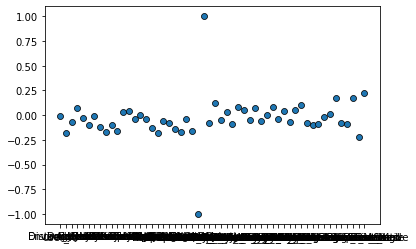

In [0]:
sns.scatterplot(data = A['Attrition_Yes'],edgecolor='black')

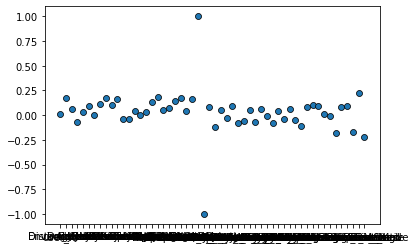

In [0]:
sns.scatterplot(data = A['Attrition_No'],edgecolor='black')

In [0]:
pd.plotting.scatter_matrix(train_clean, alpha = 0.2, figsize=(62,62))